In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

## Heart Disease

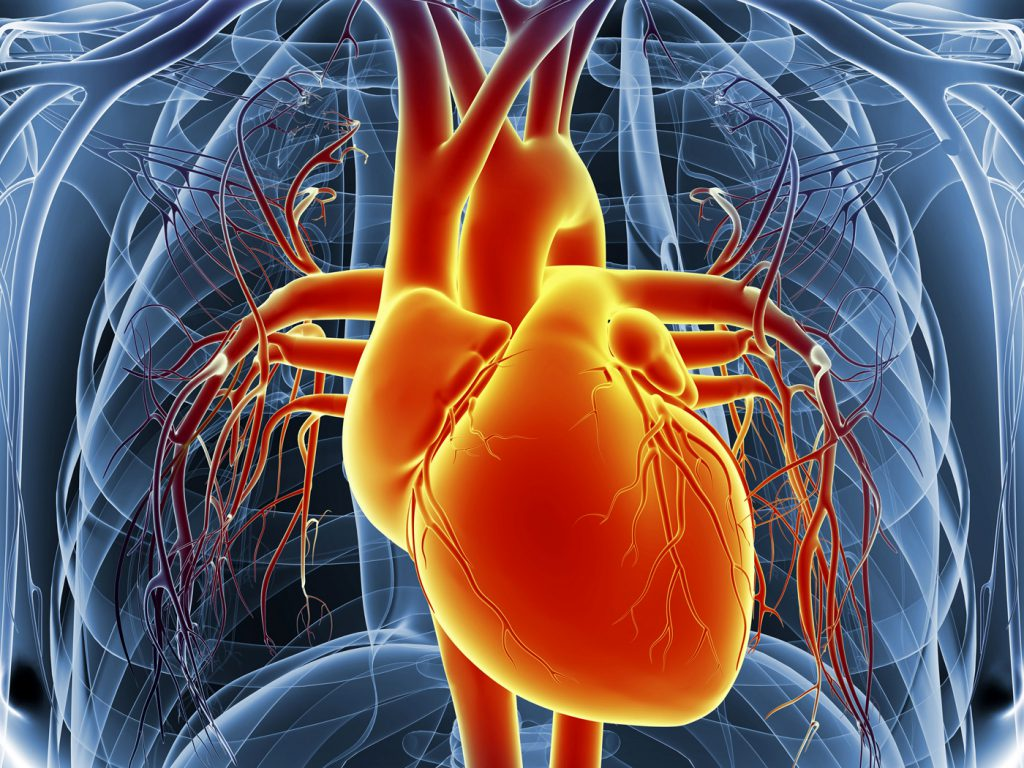

In [2]:
from IPython.display import Image
Image(filename = "data/SSBlog_HeartDisease.jpg", width=400, height=400)

#### Read training and test data

In [3]:
df_train = pd.read_csv("data/heart_train.csv")
df_test = pd.read_csv("data/heart_test.csv")

In [4]:
# print fist five rows of the training data
df_train.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,54,male,typical angina,192,283,lower than 120mg/ml,normal,195,no,0.0,flat,1,reversable defect,0
1,54,male,atypical angina,150,232,lower than 120mg/ml,normal,165,no,1.6,flat,0,reversable defect,1
2,51,male,non-anginal pain,125,213,lower than 120mg/ml,normal,125,yes,1.4,flat,1,fixed defect,1
3,52,male,typical angina,134,201,lower than 120mg/ml,ST-T wave abnormality,158,no,0.8,flat,1,fixed defect,1
4,57,male,0,132,207,lower than 120mg/ml,ST-T wave abnormality,168,yes,0.0,flat,0,reversable defect,1


In [5]:
# check info of all columns in the training data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 14 columns):
age                        203 non-null int64
sex                        203 non-null object
chest_pain_type            203 non-null object
resting_blood_pressure     203 non-null int64
cholesterol                203 non-null int64
fasting_blood_sugar        203 non-null object
rest_ecg                   203 non-null object
max_heart_rate_achieved    203 non-null int64
exercise_induced_angina    203 non-null object
st_depression              203 non-null float64
st_slope                   203 non-null object
num_major_vessels          203 non-null int64
thalassemia                203 non-null object
target                     203 non-null int64
dtypes: float64(1), int64(6), object(7)
memory usage: 22.3+ KB


#### Create a new data frame which includes only <font color=red>**age**</font> and  <font color=red>**cholesterol**</font> cols.

In [6]:
df_train_reduced = df_train[["age","cholesterol"]]
df_train_reduced.head()

,age,cholesterol
0,54,283
1,54,232
2,51,213
3,52,201
4,57,207


In [7]:
df_test_reduced = df_test[["age","cholesterol"]]
df_test_reduced.head()

,age,cholesterol
0,48,275
1,58,225
2,56,283
3,54,286
4,45,160


In [8]:
# check the shape of new dataframes
print("Shape of training data: ", df_train_reduced.shape)
print("Shape of test data: ", df_test_reduced.shape)

Shape of training data:  (203, 2)
Shape of test data:  (100, 2)


#### <font color=red> Predictor of Logistic Regression </font>

#### $p_c(x) = \frac{1}{1+e^{-c^Tx}} = \frac{1}{1+e^{-c_0 - c_1*age - c_2*cholesterol}}$

#### <font color=red> Loss on the prediction of $x_i$'s label </font>

#### $L_i(c_0, c_1, c_2) = -y_i\log(p_c(x_i))-(1-y_i)\log(1-p_c(x_i))$

#### <font color=red> Total loss for a whole dataset </font>
#### $L(c_0, c_1, c_2) = \frac{1}{203}\sum_{i=1}^{203}L_i(c_0, c_1, c_2)$

#### Extract Features from training dataframe 

In [9]:
# converting to numpy array
X_train = df_train_reduced.values
y_train = df_train['target'].values

In [10]:
X_test = df_test_reduced.values # also converting to numpy array

#### Build logistic regression model

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
# initialize model
logreg = LogisticRegression(penalty='none', solver='saga', max_iter = 1000)
# 'saga': a kind of stochastic gradient descent, see documenatation
# 'penalty' : haven't studied yet... see documentation
# 'max_iter' : increase iterations of grad. desc. 

In [13]:
# fit model
logreg.fit(X_train, y_train)
# may see ConvergenceWarning if max_iter set to default, 
#     may try to increase iterations of gradient descents to fix, see documentation

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
# coefficents of logistic regression model
logreg.coef_

array([[-0.02420918,  0.00630415]])

In [15]:
# intercept of logistic regression model
logreg.intercept_

array([0.00210927])

#### <font color=red> Our optimized predictor </font>
#### $p_c(x) = \frac{1}{1+e^{1.0 + -0.0242077*age + 0.00630392*cholesterol}}$

### Predict labels of the test data

In [ ]:
# Get Features of Test data
#X_test = ??? # do not need

In [16]:
# Predicted value (predicted probability)
predicted_values = logreg.predict_proba(X_test)[:, 1]
# predicted_values: second column

In [23]:
#logreg.predict_proba(X_test)

#### <font color=red>Note:</font> logreg.predict_proba($x_i$)[:, 1] = $p_c(x_i)$

In [18]:
# choose threshold
threshold = 0.5

In [19]:
# predicted labels
predicted_labels = (predicted_values>=threshold).astype(int) # astype converts boolean to int

In [20]:
predicted_labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1])

#### Validate the perforamnce of the logistic regression model

In [21]:
# load Real test labels
y_test = pd.read_csv('data/heart_test_labels.csv').values
# y_test

In [22]:
# Flatten: 2D to 1D
y_test = y_test.flatten()

In [23]:
y_test

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0])

#### Performance metric
#### <font color=red>$Accuracy = \frac{\text{num. of correctly predicted labels}}{\text{num. of all labels}}$</font>

#### Accuracy is not reliable due to
#### 1. Unbalanced data
#### 2. Depends on the threshold

In [24]:
accuracy = (((y_test == predicted_labels).astype(int)).sum()/y_test.shape[0])*100

In [25]:
accuracy

43.0

#### Plot training data

Text(0, 0.5, 'Cholesterol')

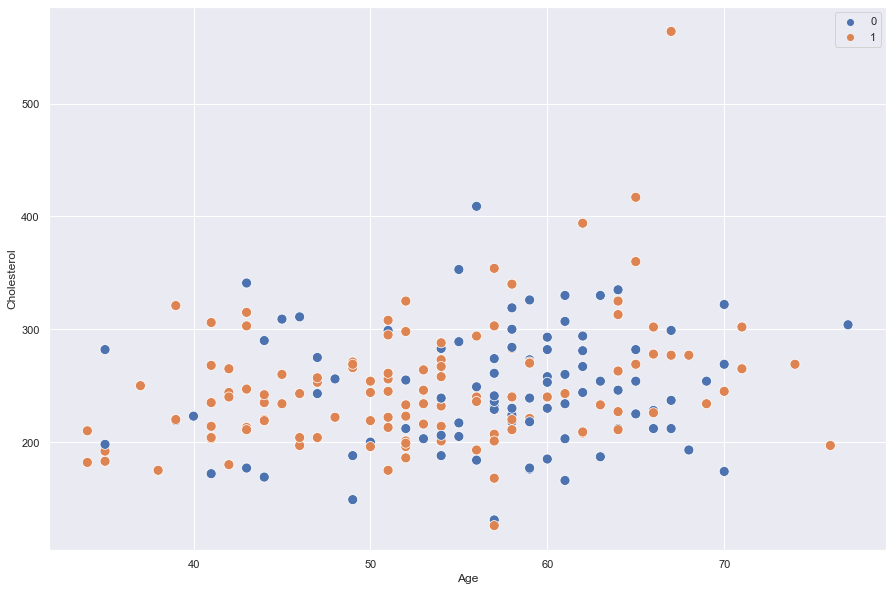

In [26]:
plt.figure(figsize=(15,10))
sns.set()
#ravel(): convert 2D to 1D ( =flatten() )
sns.scatterplot(x=df_train_reduced['age'], 
                y=df_train_reduced['cholesterol'], 
                hue=y_train.ravel(), s=100)
plt.xlabel('Age')
plt.ylabel('Cholesterol')

#### <font color=red>Decision boundary</font>
#### 1. A line, curve or manifold to seperate this class from another ones
#### 2. Decision boundary is obtained from the predictor

#### <font color=red> Solve for the decision boundary</font>

#### $p_c(x) = \frac{1}{1+e^{-0.0021 + 0.0242*age + 0.0063*cholesterol}} = Threshold$

#### $\frac{1}{1+e^{-0.0021 + 0.0242*age + 0.0063*cholesterol}} = 0.5$
...
#### $A*age+B*cholesterol = C$

#### Plot decision boundary

In [27]:
x1_min, x1_max = X_train[:, 0].min() - 5, X_train[:, 0].max() + 5
# X_train[:, 0] -> Age
# X_train[:, 1] -> cholesterol
x2_min, x2_max = X_train[:, 1].min() - 5, X_train[:, 1].max() + 5

In [28]:
x1_grids = np.arange(x1_min, x1_max, .2)

In [38]:
#x1_grids

In [29]:
x2_grids = np.arange(x2_min, x2_max, 1.0)

In [40]:
#x2_grids

In [30]:
# create a mesh grid
xx1, xx2 = np.meshgrid(x1_grids, x2_grids)

In [31]:
# collect all discrete points on the 2D space
data_points = np.c_[xx1.ravel(), xx2.ravel()]

In [41]:
data_points.shape

(118720, 2)

In [32]:
# predict the labels of all data points
data_points_labels = logreg.predict(data_points)

In [33]:
# check the shape of data_points_labels
data_points_labels.shape

(118720,)

In [34]:
# reshape(Ndim): convert 1D to 2D with dim of Ndim
data_points_labels = data_points_labels.reshape(xx1.shape)

In [35]:
#check the shape of data_points_labels again
data_points_labels.shape

(448, 265)

#### We finally plot the decision boundary

(121.0, 568.0)

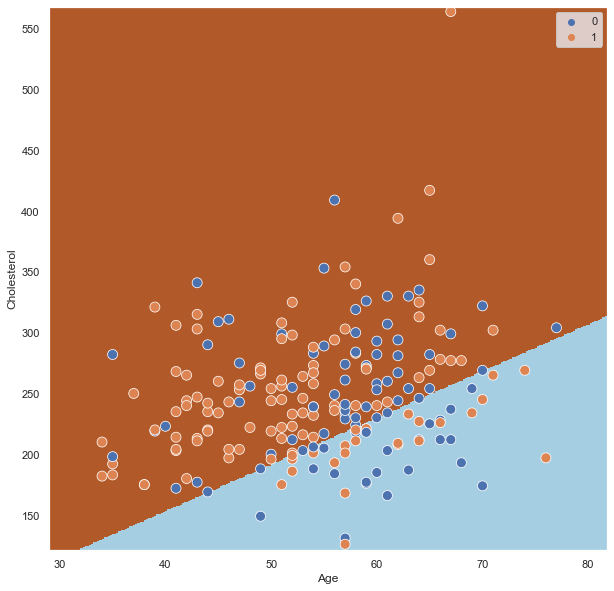

In [42]:
sns.set()
plt.figure(1, figsize=(10, 10))
plt.pcolormesh(xx1, xx2, data_points_labels, 
               cmap=plt.cm.Paired)
sns.scatterplot(x=X_train[:, 0], 
                y=X_train[:, 1], 
                hue=y_train.ravel(), s=100)
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())